<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/saptarshi_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --user scikit-learn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 28.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_patients = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/patients.csv.gz')
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299772,19999828,F,46,2147,2017 - 2019,NaN
299773,19999829,F,28,2186,2008 - 2010,NaN
299774,19999840,M,58,2164,2008 - 2010,2164-09-17
299775,19999914,F,49,2158,2017 - 2019,NaN


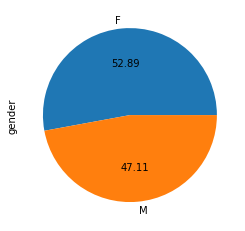

In [4]:
# biological sex for patients
df_patients['gender'].value_counts().plot(kind='pie', autopct='%.2f')

(array([55462., 35872., 27628., 29625., 30727., 31342., 31959., 21653.,
        17640., 17869.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

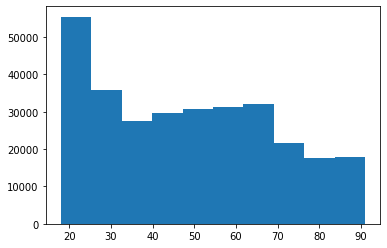

In [5]:
# approx age distribution of patients
plt.hist(df_patients['anchor_age'])

(array([ 220.,  351.,  457., 1077., 2016., 3054., 4580., 4500., 5226.,
        7607.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

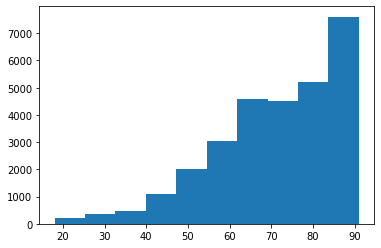

In [6]:
# approx age distribution of dead patients
plt.hist(df_patients[df_patients['dod'].notnull()]['anchor_age'])

In [7]:
df_admissions = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/admissions.csv.gz')
df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431083,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431084,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431085,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431086,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [8]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431088 entries, 0 to 431087
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431088 non-null  int64 
 1   hadm_id               431088 non-null  int64 
 2   admittime             431088 non-null  object
 3   dischtime             431088 non-null  object
 4   deathtime             8625 non-null    object
 5   admission_type        431088 non-null  object
 6   admission_location    431088 non-null  object
 7   discharge_location    311774 non-null  object
 8   insurance             431088 non-null  object
 9   language              431088 non-null  object
 10  marital_status        421868 non-null  object
 11  race                  431088 non-null  object
 12  edregtime             299260 non-null  object
 13  edouttime             299260 non-null  object
 14  hospital_expire_flag  431088 non-null  int64 
dtypes: int64(3), obje

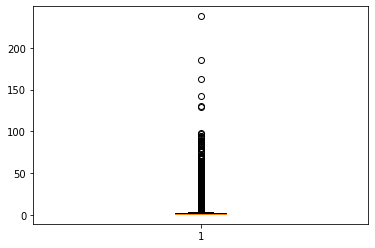

In [9]:
# no missing data in the main columns
# distribution for admissions per patients
plt.boxplot(df_admissions.groupby('subject_id')['hadm_id'].size());

In [10]:
#race distribution as pie, ignoring less than 1% (~1800)
import numpy as np
df_sub_race = df_admissions[['subject_id','race']].drop_duplicates(subset=['subject_id'])

In [11]:
# Combine races
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(WHITE.*)','WHITE', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(BLACK.*)','BLACK', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(ASIAN.*)','ASIAN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(HISPANIC.*)','HISPANIC/LATINO', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('UNABLE TO OBTAIN','UNKNOWN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('PATIENT DECLINED TO ANSWER','UNKNOWN', regex=True)
df_simplified_race = df_sub_race['race'].value_counts().reset_index()
df_simplified_race.columns = ['race', 'counts']
df_simplified_race

,race,counts
0,WHITE,120808
1,BLACK,23459
2,UNKNOWN,10113
3,HISPANIC/LATINO,9761
4,ASIAN,7552
5,OTHER,7464
6,PORTUGUESE,500
7,AMERICAN INDIAN/ALASKA NATIVE,387
8,MULTIPLE RACE/ETHNICITY,252
9,SOUTH AMERICAN,240


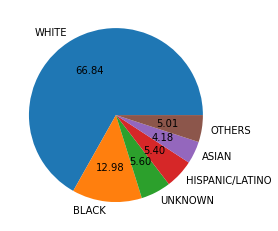

In [12]:
pd.options.mode.chained_assignment = None
if df_simplified_race['race'].str.contains('OTHERS').any()==False:
  df_simplified_race.iloc[5] = df_simplified_race.iloc[5:].sum()
  df_simplified_race['race'][5] = 'OTHERS'

plt.pie(df_simplified_race['counts'][:6], labels=df_simplified_race['race'][:6], autopct='%.2f');

In [13]:
#calculate length of stay per admission in hours
df_admissions['los'] = (pd.to_datetime(df_admissions['dischtime'])-pd.to_datetime(df_admissions['admittime']))/pd.Timedelta(hours=1)

In [14]:
#The mean length of stay
df_admissions['los'].mean()

107.51788467010601

In [15]:
df_merged = pd.merge(df_patients[['subject_id','gender','anchor_age']], df_admissions[['subject_id','hadm_id','los','admission_type','insurance','marital_status','race','hospital_expire_flag']], on='subject_id', how='inner')
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,10000032,F,52,22595853,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,10000032,F,52,22841357,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,10000032,F,52,25742920,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,10000032,F,52,29079034,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,10000068,F,19,25022803,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...,...,...
431083,19999828,F,46,25744818,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,19999828,F,46,29734428,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,19999840,M,58,21033226,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,19999840,M,58,26071774,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421868 entries, 0 to 431086
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            421868 non-null  int64  
 1   gender                421868 non-null  object 
 2   anchor_age            421868 non-null  int64  
 3   hadm_id               421868 non-null  int64  
 4   los                   421868 non-null  float64
 5   admission_type        421868 non-null  object 
 6   insurance             421868 non-null  object 
 7   marital_status        421868 non-null  object 
 8   race                  421868 non-null  object 
 9   hospital_expire_flag  421868 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 35.4+ MB


In [20]:
df_merged.dropna(inplace=True)

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421868 entries, 0 to 431086
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            421868 non-null  int64  
 1   gender                421868 non-null  object 
 2   anchor_age            421868 non-null  int64  
 3   hadm_id               421868 non-null  int64  
 4   los                   421868 non-null  float64
 5   admission_type        421868 non-null  object 
 6   insurance             421868 non-null  object 
 7   marital_status        421868 non-null  object 
 8   race                  421868 non-null  object 
 9   hospital_expire_flag  421868 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 35.4+ MB


In [23]:
Y = df_merged['los'].copy()
df_final = df_merged.drop(columns=['subject_id', 'hadm_id', 'los'])
df_final

,gender,anchor_age,admission_type,insurance,marital_status,race,hospital_expire_flag
0,F,52,URGENT,Other,WIDOWED,WHITE,0
1,F,52,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,F,52,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,F,52,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,F,19,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...
431082,M,57,ELECTIVE,Medicaid,SINGLE,BLACK/AFRICAN AMERICAN,0
431083,F,46,EW EMER.,Other,SINGLE,WHITE,0
431084,F,46,EW EMER.,Other,SINGLE,WHITE,0
431085,M,58,EW EMER.,Other,WIDOWED,WHITE,1


In [24]:
Y.describe()

count    421868.000000
mean        106.297540
std         156.694661
min         -22.650000
25%          25.516667
50%          65.266667
75%         124.150000
max        7103.716667
Name: los, dtype: float64

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_attribs = ["anchor_age"]
cat_attribs = ["gender","admission_type","insurance","marital_status", "race","hospital_expire_flag"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs),])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['anchor_age']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'admission_type', 'insurance',
                                  'marital_status', 'race',
                                  'hospital_expire_flag'])])

In [26]:
# import numpy as np
# from sklearn.compose import make_column_selector, make_column_transformer
# preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),(cat_pipeline, make_column_selector(dtype_include=object)),)

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df_final, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['anchor_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Y_preds = lin_reg.predict(df_final)
lin_rmse = mean_squared_error(Y, Y_preds, squared=False)
lin_mape = mean_absolute_percentage_error(Y, Y_preds)
lin_r2_score = r2_score(Y, Y_preds)

print('RMSE: ', lin_rmse)
print('MAPE: ', lin_mape)
print('R-squared: ', lin_r2_score)

RMSE:  146.14939598250524
MAPE:  4845722555728.133
R-squared:  0.13006525105539002


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(preprocessing, RandomForestRegressor())
rfr.fit(df_final, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['anchor_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [31]:
# Previous cell RandomForestRegressor takes 20+ mins
Y_preds = rfr.predict(df_final)
rfr_rmse = mean_squared_error(Y, Y_preds, squared=False)
rfr_mape = mean_absolute_percentage_error(Y, Y_preds)
rfr_r2_score = r2_score(Y, Y_preds)

print('RMSE: ', rfr_rmse)
print('MAPE: ', rfr_mape)
print('R-squared: ', rfr_r2_score)

RMSE:  130.09904312175803
MAPE:  3839407293715.95
R-squared:  0.31064832713700996


In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(df_final, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['anchor_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [33]:
Y_preds = tree_reg.predict(df_final)
tree_reg_rmse = mean_squared_error(Y, Y_preds, squared=False)
tree_reg_mape = mean_absolute_percentage_error(Y, Y_preds)
tree_reg_r2_score = r2_score(Y, Y_preds)

print('RMSE: ', tree_reg_rmse)
print('MAPE: ', tree_reg_mape)
print('R-squared: ', tree_reg_r2_score)

RMSE:  128.50012179418965
MAPE:  3712827412511.577
R-squared:  0.32748851153828984
